# Voting in Virginia Starter Notebook

This is just a starter notebook with some "heatmap"/choropleth plots of Virginia and the 2020 election.

In [6]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data
gdf = gpd.read_file("./VirginiaAdministrativeBoundary_ClippedToShoreline.shp/VirginiaCounty_ClippedToShoreline.shx") # Load Virginia shapefile for maps
#gdf = gpd.read_file("./va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx")
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
#del gdf, cdf

In [7]:
# 2012: 0002_ds191_20125_county_E.csv
# 2016: 0002_ds225_20165_county_E.csv
# 2020: 0002_ds249_20205_county_E.csv
csv_files = ["./data/county_data/0002_ds191_20125_county_E.csv", "./data/county_data/0002_ds225_20165_county_E.csv", "./data/county_data/0002_ds249_20205_county_E.csv"]

identifier_columns = ["STATE", "STATEA", "COUNTYA"]

# relevant columns: 2012 variables, 2016 variables, 2020 variables
# variable order: sex by age, race, ratio of income to poverty level in the past 12 months
# column names pertain to each cattegory of each variable, look at the codebook for more information
relevant_columns = [
    "QSEE001", "QSEE002", "QSEE003", "QSEE004", "QSEE005", "QSEE006", "QSEE007", "QSEE008", "QSEE009", "QSEE010", "QSEE011", "QSEE012", "QSEE013", "QSEE014", "QSEE015", "QSEE016", "QSEE017", "QSEE018", "QSEE019", "QSEE020", "QSEE021", "QSEE022", "QSEE023", "QSEE024", "QSEE025", "QSEE026", "QSEE027", "QSEE028", "QSEE029", "QSEE030", "QSEE031", "QSEE032", "QSEE033", "QSEE034", "QSEE035", "QSEE036", "QSEE037", "QSEE038", "QSEE039", "QSEE040", "QSEE041", "QSEE042", "QSEE043", "QSEE044", "QSEE045", "QSEE046", "QSEE047", "QSEE048", "QSEE049",
    "QSQE001", "QSQE002", "QSQE003", "QSQE004", "QSQE005", "QSQE006", "QSQE007", "QSQE008", "QSQE009", "QSQE010",
    "QUVE001", "QUVE002", "QUVE003", "QUVE004", "QUVE005", "QUVE006", "QUVE007", "QUVE008",
    "AF2AE001", "AF2AE002", "AF2AE003", "AF2AE004", "AF2AE005", "AF2AE006", "AF2AE007", "AF2AE008", "AF2AE009", "AF2AE010", "AF2AE011", "AF2AE012", "AF2AE013", "AF2AE014", "AF2AE015", "AF2AE016", "AF2AE017", "AF2AE018", "AF2AE019", "AF2AE020", "AF2AE021", "AF2AE022", "AF2AE023", "AF2AE024", "AF2AE025", "AF2AE026", "AF2AE027", "AF2AE028", "AF2AE029", "AF2AE030", "AF2AE031", "AF2AE032", "AF2AE033", "AF2AE034", "AF2AE035", "AF2AE036", "AF2AE037", "AF2AE038", "AF2AE039", "AF2AE040", "AF2AE041", "AF2AE042", "AF2AE043", "AF2AE044", "AF2AE045", "AF2AE046", "AF2AE047", "AF2AE048", "AF2AE049",
    "AF2ME001", "AF2ME002", "AF2ME003", "AF2ME004", "AF2ME005", "AF2ME006", "AF2ME007", "AF2ME008", "AF2ME009", "AF2ME010",
    "AF43E001", "AF43E002", "AF43E003", "AF43E004", "AF43E005", "AF43E006", "AF43E007", "AF43E008",
    "AMPKE001", "AMPKE002", "AMPKE003", "AMPKE004", "AMPKE005", "AMPKE006", "AMPKE007", "AMPKE008", "AMPKE009", "AMPKE010", "AMPKE011", "AMPKE012", "AMPKE013", "AMPKE014", "AMPKE015", "AMPKE016", "AMPKE017", "AMPKE018", "AMPKE019", "AMPKE020", "AMPKE021", "AMPKE022", "AMPKE023", "AMPKE024", "AMPKE025", "AMPKE026", "AMPKE027", "AMPKE028", "AMPKE029", "AMPKE030", "AMPKE031", "AMPKE032", "AMPKE033", "AMPKE034", "AMPKE035", "AMPKE036", "AMPKE037", "AMPKE038", "AMPKE039", "AMPKE040", "AMPKE041", "AMPKE042", "AMPKE043", "AMPKE044", "AMPKE045", "AMPKE046", "AMPKE047", "AMPKE048", "AMPKE049",
    "AMPWE001", "AMPWE002", "AMPWE003", "AMPWE004", "AMPWE005", "AMPWE006", "AMPWE007", "AMPWE008", "AMPWE009", "AMPWE010",
    "AMZME001", "AMZME002", "AMZME003", "AMZME004", "AMZME005", "AMZME006", "AMZME007", "AMZME008"
]

#parse through csv files and put into dataFrames list
first_time = True
dataframes = []
for file in csv_files:
    df1 = pd.read_csv(file, low_memory=False, encoding='latin1')
    if first_time:
        df2 = df1[identifier_columns]
        dataframes.append(df2)
        first_time = False
    df1.drop(columns=[col for col in df1.columns if col not in relevant_columns], inplace=True, errors='ignore')
    dataframes.append(df1)

#concat all DataFrames into one DataFrame
demographics = pd.concat(dataframes, axis=1)
demographics = demographics.loc[demographics["STATE"] == "Virginia"]
print(f"number of missing values: {demographics.isna().sum().sum()}")
#taking a look at the nghis data
print(demographics.head())
print(demographics.shape)

number of missing values: 0
         STATE STATEA COUNTYA QSEE001 QSEE002 QSEE003 QSEE004 QSEE005 QSEE006  \
2821  Virginia     51     001   33454   16230    1001    1085     967     647   
2822  Virginia     51     003   99484   47564    2913    2862    3245    1832   
2823  Virginia     51     005   16297    7956     410     504     532     353   
2824  Virginia     51     007   12674    6272     316     392     442     331   
2825  Virginia     51     009   32301   15406     983     808    1117     624   

     QSEE007  ... AMPWE009 AMPWE010 AMZME001 AMZME002 AMZME003 AMZME004  \
2821     350  ...      104     1047    54387     2189     2931     1712   
2822    2474  ...      511      440    32227     2450     3923     2549   
2823     195  ...      835     2775   101147     3988     3765     1755   
2824     185  ...       13      228    14744     1378      937      617   
2825     500  ...       99      205    12873      517      865      203   

     AMZME005 AMZME006 AMZME007 AM

In [8]:
demographics["FIPS"] = (demographics["STATEA"].astype(str) + demographics["COUNTYA"].astype(str)).astype(int)
demographics.drop(columns=["STATE", "STATEA", "COUNTYA"], inplace=True, errors='ignore')
county_demographics = pd.merge(cdf, demographics, on="FIPS")
print(county_demographics.head())
print(county_demographics.shape)
county_demographics.to_csv("./data/county_demographics.csv")

           County  Population2022   FIPS  District                   N1  \
0        Accomack           33191  51001         2       Northumberland   
1       Albemarle          114534  51003         5  CharlottesvilleCity   
2  AlexandriaCity          155525  51510         8              Fairfax   
3       Alleghany           14835  51005         6                Craig   
4          Amelia           13455  51007         5         PrinceEdward   

           N2         N3             N4           N5        N6  ... AMPWE009  \
0   Lancaster  Middlesex        Mathews  Northampton       NaN  ...      104   
1      Nelson    Augusta     Rockingham       Greene    Orange  ...      511   
2   Arlington        NaN            NaN          NaN       NaN  ...     1230   
3        Bath  Botetourt  CovingtonCity   Rockbridge       NaN  ...      835   
4  Cumberland   Powhatan   Chesterfield    Dinwiddie  Nottoway  ...       13   

  AMPWE010 AMZME001 AMZME002 AMZME003 AMZME004 AMZME005 AMZME006 AMZ

In [9]:
demographics.describe()

,FIPS
count,134.000000
mean,51265.865672
std,271.725558
min,51001.000000
25%,51069.500000
50%,51140.000000
75%,51547.500000
max,51840.000000


In [10]:
#number of missing values for each column
missing_values = demographics.isna().sum()

print(missing_values)

QSEE001     0
QSEE002     0
QSEE003     0
QSEE004     0
QSEE005     0
           ..
AMZME005    0
AMZME006    0
AMZME007    0
AMZME008    0
FIPS        0
Length: 202, dtype: int64


In [11]:
#number of missing values for each column
missing_values = county_demographics.isna().sum()

print(missing_values)

County            0
Population2022    0
FIPS              0
District          0
N1                0
                 ..
AMZME004          0
AMZME005          0
AMZME006          0
AMZME007          0
AMZME008          0
Length: 217, dtype: int64


Combining geodata:

In [12]:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(county_demographics,left_on='FIPS_left',right_on='FIPS') 

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMPWE009 AMPWE010  AMZME001  \
0        CO  1195.366291  4.949957e+06  ...       104     1047     54387   
1        CO   725.634334  2.310198e+05  ...       511      440     32227   
2        CO   449.544769  2.062654e+05  ...       835     2775    101147   
3        CO   360.945234  1.776617e+05  ...        13      228     14744   
4        CO   478.766949  1.876610e+05  ...        99      205     12873   

  AMZME002  AMZME003  AMZME004  AMZME0

Combing with voting data from 2020 now:

In [13]:
df20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMZME001 AMZME002  AMZME003  \
0        CO  1195.366291  4.949957e+06  ...     54387     2189      2931   
1        CO   725.634334  2.310198e+05  ...     32227     2450      3923   
2        CO   449.544769  2.062654e+05  ...    101147     3988      3765   
3        CO   360.945234  1.776617e+05  ...     14744     1378       937   
4        CO   478.766949  1.876610e+05  ...     12873      517       865   

  AMZME004  AMZME005  AMZME006  AMZME0

2016 votiing data:

In [14]:
df16 = vdf.loc[ vdf['year']==2016,:] # Only the 2016 data

Dvotes = df16.loc[(df16['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2016')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df16.loc[(df16['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2016')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMZME003 AMZME004  AMZME005  \
0        CO  1195.366291  4.949957e+06  ...      2931     1712      2347   
1        CO   725.634334  2.310198e+05  ...      3923     2549      1484   
2        CO   449.544769  2.062654e+05  ...      3765     1755      2497   
3        CO   360.945234  1.776617e+05  ...       937      617       539   
4        CO   478.766949  1.876610e+05  ...       865      203      1140   

  AMZME006  AMZME007  AMZME008  dem_vo

2012 data:

In [15]:
df12 = vdf.loc[ vdf['year']==2012,:] # Only the 2012 data

Dvotes = df12.loc[(df12['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2012')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df12.loc[(df12['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2012')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

print(f"number of missing values: {df.isna().sum().sum()}")
#datasize
print(df.head())
print(df.shape)

number of missing values: 936
  STCOFIPS     GNIS       NAME          NAMELSAD GSOURCE LADOPT  LASTUPDATE  \
0    51001  1480091   Accomack   Accomack County       T      N  2014-08-20   
1    51003  1675170  Albemarle  Albemarle County       L      Y  2021-03-29   
2    51005  1492459  Alleghany  Alleghany County       V      N  2014-09-15   
3    51007  1497770     Amelia     Amelia County       T      Y  2021-03-29   
4    51009  1480095    Amherst    Amherst County       V      N  2020-09-11   

  JURISTYPE     AREASQMI    Shape_Leng  ...  AMZME005 AMZME006  AMZME007  \
0        CO  1195.366291  4.949957e+06  ...      2347     2827      1735   
1        CO   725.634334  2.310198e+05  ...      1484     2554      1230   
2        CO   449.544769  2.062654e+05  ...      2497     4580      1763   
3        CO   360.945234  1.776617e+05  ...       539      973       507   
4        CO   478.766949  1.876610e+05  ...      1140      971       246   

  AMZME008  dem_votes_2020  rep_votes_

In [16]:
#export to csv
df.to_csv('full_va_dataset.csv', index=False)

*Random forest model*

Creating a target variable for the model:

In [17]:
#calculating vote differences
df['vote_diff_2020'] = df['rep_votes_2020'] - df['dem_votes_2020']
df['vote_diff_2016'] = df['rep_votes_2016'] - df['dem_votes_2016']
df['vote_diff_2012'] = df['rep_votes_2012'] - df['dem_votes_2012']

#applying the inverse hyperbolic sine transformation
df['vote_diff_ihs_2020'] = np.arcsinh(df['vote_diff_2020'])
df['vote_diff_ihs_2016'] = np.arcsinh(df['vote_diff_2016'])
df['vote_diff_ihs_2012'] = np.arcsinh(df['vote_diff_2012'])

#calculating the average IHS transformed vote difference
df['avg_vote_diff_ihs'] = df[['vote_diff_ihs_2020', 'vote_diff_ihs_2016', 'vote_diff_ihs_2012']].mean(axis=1)
print(df[['vote_diff_2020', 'vote_diff_ihs_2020',
          'vote_diff_2016', 'vote_diff_ihs_2016',
          'vote_diff_2012', 'vote_diff_ihs_2012',
          'avg_vote_diff_ihs']].describe())

       vote_diff_2020  vote_diff_ihs_2020  vote_diff_2016  vote_diff_ihs_2016  \
count      133.000000          133.000000      133.000000          133.000000   
mean     -3392.015038            2.534647    -1594.210526            3.412792   
std      27040.291611            8.698192    21546.687172            8.249139   
min    -251542.000000          -13.128512  -197423.000000          -12.886251   
25%      -1286.000000           -7.852439     -569.000000           -7.037028   
50%       1233.000000            7.810353     1610.000000            8.077137   
75%       5010.000000            9.212338     4686.000000            9.145482   
max      23424.000000           10.754664    20891.000000           10.640221   

       vote_diff_2012  vote_diff_ihs_2012  avg_vote_diff_ihs  
count      133.000000          133.000000         133.000000  
mean     -1124.812030            2.493952           2.813797  
std      14012.807236            8.240829           8.074330  
min    -108500.000

In [18]:
print(df.columns.tolist())

['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'QSEE001', 'QSEE002', 'QSEE003', 'QSEE004', 'QSEE005', 'QSEE006', 'QSEE007', 'QSEE008', 'QSEE009', 'QSEE010', 'QSEE011', 'QSEE012', 'QSEE013', 'QSEE014', 'QSEE015', 'QSEE016', 'QSEE017', 'QSEE018', 'QSEE019', 'QSEE020', 'QSEE021', 'QSEE022', 'QSEE023', 'QSEE024', 'QSEE025', 'QSEE026', 'QSEE027', 'QSEE028', 'QSEE029', 'QSEE030', 'QSEE031', 'QSEE032', 'QSEE033', 'QSEE034', 'QSEE035', 'QSEE036', 'QSEE037', 'QSEE038', 'QSEE039', 'QSEE040', 'QSEE041', 'QSEE042', 'QSEE043', 'QSEE044', 'QSEE045', 'QSEE046', 'QSEE047', 'QSEE048', 'QSEE049', 'QSQE001', 'QSQE002', 'QSQE003', 'QSQE004', 'QSQE005', 'QSQE006', 'QSQE007', 'QSQE008', 'QSQE009', 'QSQE010', 'QUVE001', 'QUVE002', 'QUVE003', 'QUVE004', 'QUVE005', 'QUVE006', 'QUVE007

Splitting dataframe into geography and model:

In [19]:
#variables to help visualize the data after
geo_df = df[['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12']]

#variables for the model (kept FIPS to remerge the dataframes but will drop it from features)
model_columns = [
    "QSEE001", "QSEE002", "QSEE003", "QSEE004", "QSEE005", "QSEE006", "QSEE007", "QSEE008", "QSEE009", "QSEE010", "QSEE011", "QSEE012", "QSEE013", "QSEE014", "QSEE015", "QSEE016", "QSEE017", "QSEE018", "QSEE019", "QSEE020", "QSEE021", "QSEE022", "QSEE023", "QSEE024", "QSEE025", "QSEE026", "QSEE027", "QSEE028", "QSEE029", "QSEE030", "QSEE031", "QSEE032", "QSEE033", "QSEE034", "QSEE035", "QSEE036", "QSEE037", "QSEE038", "QSEE039", "QSEE040", "QSEE041", "QSEE042", "QSEE043", "QSEE044", "QSEE045", "QSEE046", "QSEE047", "QSEE048", "QSEE049",
    "QSQE001", "QSQE002", "QSQE003", "QSQE004", "QSQE005", "QSQE006", "QSQE007", "QSQE008", "QSQE009", "QSQE010",
    "QUVE001", "QUVE002", "QUVE003", "QUVE004", "QUVE005", "QUVE006", "QUVE007", "QUVE008",
    "AF2AE001", "AF2AE002", "AF2AE003", "AF2AE004", "AF2AE005", "AF2AE006", "AF2AE007", "AF2AE008", "AF2AE009", "AF2AE010", "AF2AE011", "AF2AE012", "AF2AE013", "AF2AE014", "AF2AE015", "AF2AE016", "AF2AE017", "AF2AE018", "AF2AE019", "AF2AE020", "AF2AE021", "AF2AE022", "AF2AE023", "AF2AE024", "AF2AE025", "AF2AE026", "AF2AE027", "AF2AE028", "AF2AE029", "AF2AE030", "AF2AE031", "AF2AE032", "AF2AE033", "AF2AE034", "AF2AE035", "AF2AE036", "AF2AE037", "AF2AE038", "AF2AE039", "AF2AE040", "AF2AE041", "AF2AE042", "AF2AE043", "AF2AE044", "AF2AE045", "AF2AE046", "AF2AE047", "AF2AE048", "AF2AE049",
    "AF2ME001", "AF2ME002", "AF2ME003", "AF2ME004", "AF2ME005", "AF2ME006", "AF2ME007", "AF2ME008", "AF2ME009", "AF2ME010",
    "AF43E001", "AF43E002", "AF43E003", "AF43E004", "AF43E005", "AF43E006", "AF43E007", "AF43E008",
    "AMPKE001", "AMPKE002", "AMPKE003", "AMPKE004", "AMPKE005", "AMPKE006", "AMPKE007", "AMPKE008", "AMPKE009", "AMPKE010", "AMPKE011", "AMPKE012", "AMPKE013", "AMPKE014", "AMPKE015", "AMPKE016", "AMPKE017", "AMPKE018", "AMPKE019", "AMPKE020", "AMPKE021", "AMPKE022", "AMPKE023", "AMPKE024", "AMPKE025", "AMPKE026", "AMPKE027", "AMPKE028", "AMPKE029", "AMPKE030", "AMPKE031", "AMPKE032", "AMPKE033", "AMPKE034", "AMPKE035", "AMPKE036", "AMPKE037", "AMPKE038", "AMPKE039", "AMPKE040", "AMPKE041", "AMPKE042", "AMPKE043", "AMPKE044", "AMPKE045", "AMPKE046", "AMPKE047", "AMPKE048", "AMPKE049",
    "AMPWE001", "AMPWE002", "AMPWE003", "AMPWE004", "AMPWE005", "AMPWE006", "AMPWE007", "AMPWE008", "AMPWE009", "AMPWE010",
    "AMZME001", "AMZME002", "AMZME003", "AMZME004", "AMZME005", "AMZME006", "AMZME007", "AMZME008",
    "FIPS", "avg_vote_diff_ihs"
]

model_df = df[model_columns]



In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

#split data into training rows and testing rows:
X = model_df.drop(['FIPS', 'avg_vote_diff_ihs'], axis=1) #dropping FIPS too as it is not a feature
y = model_df['avg_vote_diff_ihs']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#keep FIPS for later use when merging back
fips_train = model_df.loc[X_train.index, 'FIPS']
fips_test = model_df.loc[X_test.index, 'FIPS']

model = RandomForestRegressor(n_estimators=100, random_state=42)
rf = model.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)

<Axes: xlabel='avg_vote_diff_ihs'>

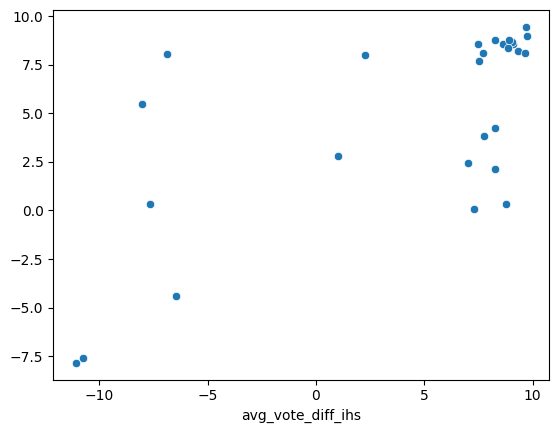

In [21]:
# Scatterplot of predicted v. actual:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

In [22]:
rf.score(X_test,y_test) # Rsq measure

0.447409592378038

In [23]:
mse = mean_squared_error(y_test, y_hat_rf)
RMSE = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 5.276557296324533


given that the range for the vote diff is -10 to 10 i think that means theres a lot off on accuracy.

<Axes: xlabel='avg_vote_diff_ihs', ylabel='Density'>

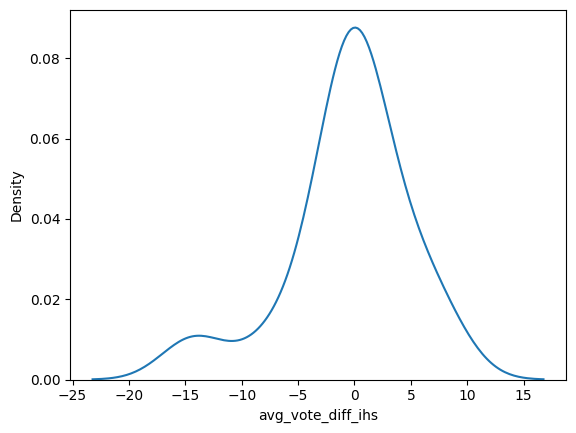

In [24]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

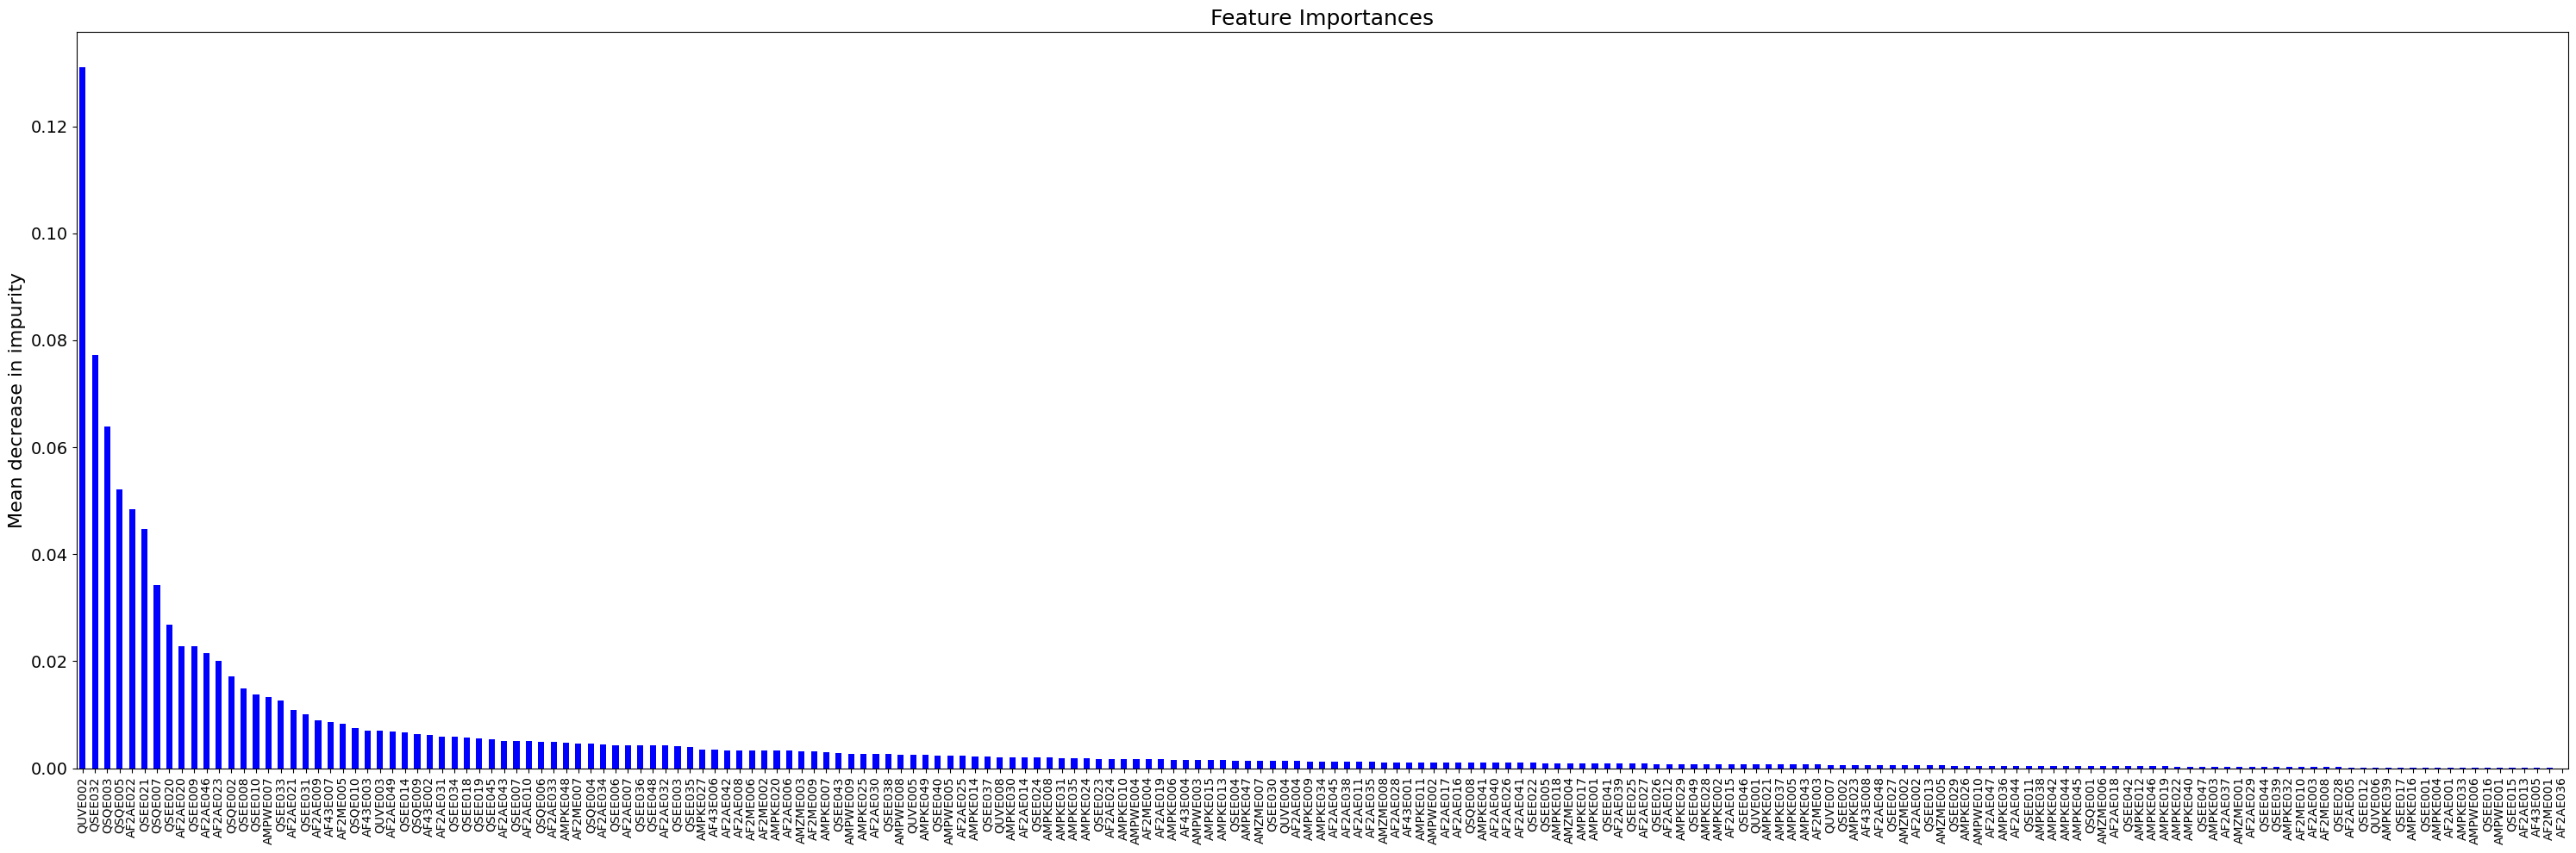

In [32]:
#feauture importance plot
import matplotlib.pyplot as plt
import pandas as pd

forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importances = forest_importances.sort_values(ascending=False)
plt.figure(figsize=(30, 10)) 

#feature importances with a bar chart
sorted_importances.plot(kind='bar', color='blue') 

plt.title('Feature Importances', fontsize=18)
plt.ylabel('Mean decrease in impurity', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=14)

plt.tight_layout()

#export plot
plt.savefig('feature_importances.png', dpi=300)

plt.show()

Merging model back with geography dataframe to visualize model's prediction on virginia.

<Axes: title={'center': "Random Forest Model's Predictor for Avg Vote Difference (IHS)"}>

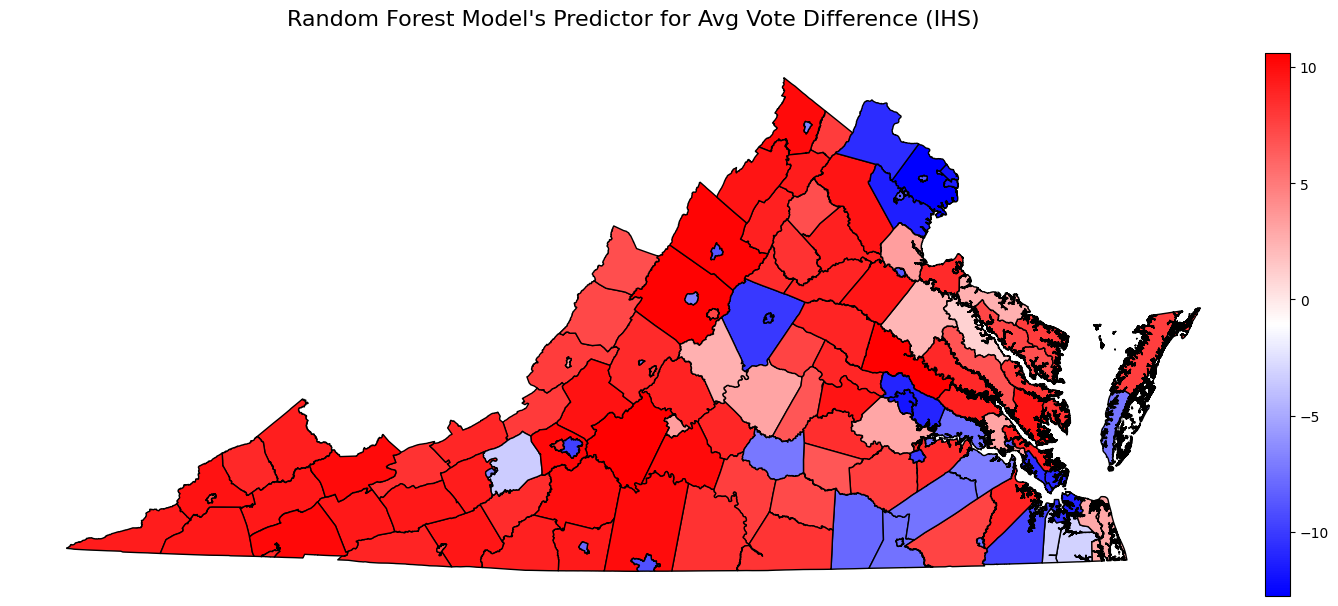

In [33]:
#DataFrame from predictions and FIPS codes
predictions_df = pd.DataFrame({
    'FIPS': fips_test,  # FIPS codes corresponding to the test set
    'avg_vote_diff_ihs': y_hat_rf  # Predictions from the model
})

# Merge the geographic data with the predictions
result_df = pd.merge(geo_df, predictions_df, on='FIPS', how='left')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
ax.set_title("Random Forest Model's Predictor for Avg Vote Difference (IHS)", fontsize=16, pad=20)
df.plot(ax=ax,column='avg_vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')


Visual representation of the models predicted avg_vote diff in the different counties. Red = republican and blue = democratic party. I guess we use this to write how we can forecast the 2024 election? 

Everything below is the professor's code that was already here:

# Population Data

Here is code to make choropleth maps:

<Axes: >

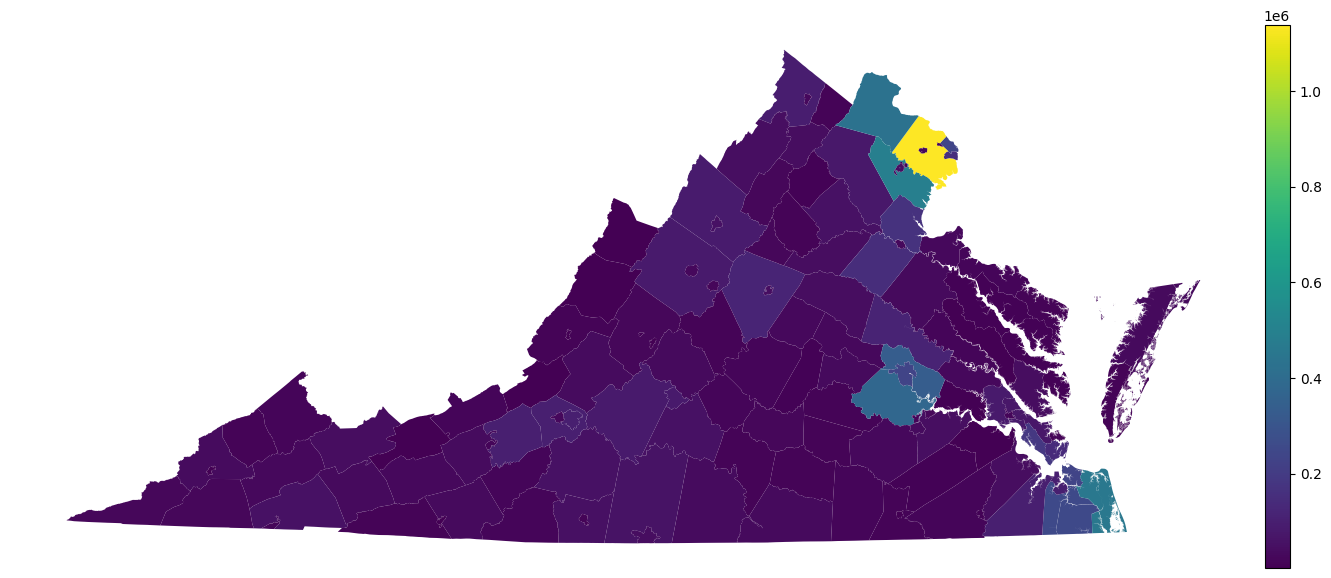

In [85]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='Population2022',legend=True,cax=cax)

# Voting Districts

My map:

<Axes: >

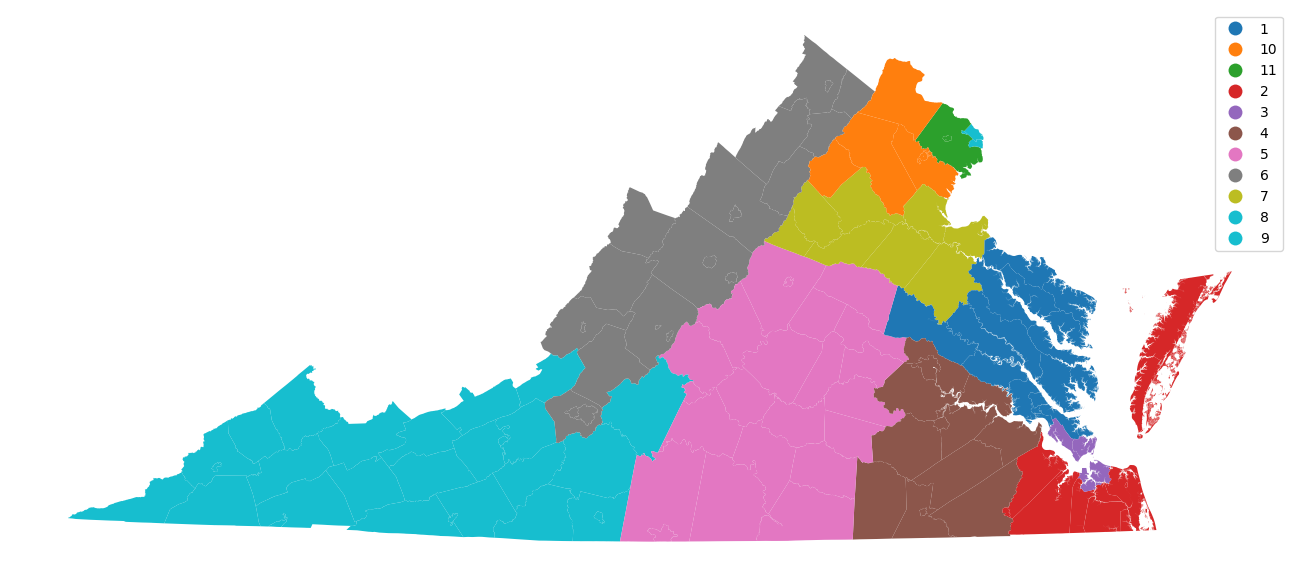

In [86]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
df['Districts'] = df['District'].astype(str)
df.plot(ax=ax,column='Districts',legend=True)#,cax=cax

Actual map:

<img src="va_map.jpeg" width="1350" >

This is close but there are some issues to work out.

## Voting from 2020

Clean vote data and merge into the df we're using to make maps:

In [87]:
df20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Raw 2020 Democrat votes:

<Axes: >

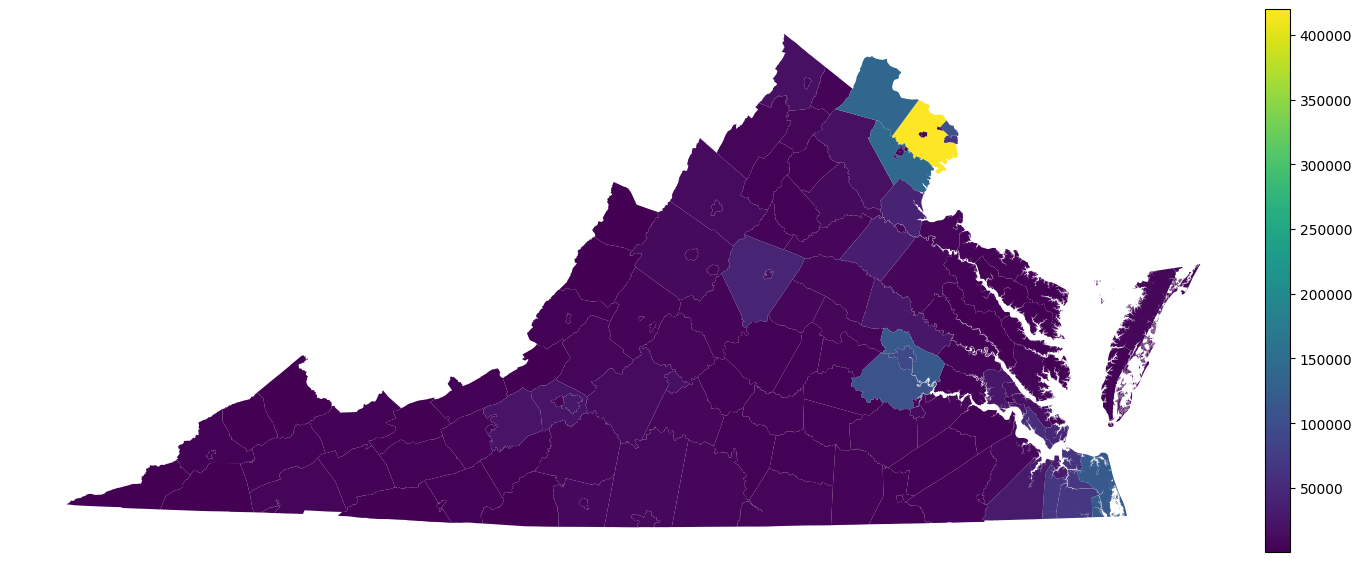

In [88]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='dem_votes_2020',legend=True,cax=cax)

Raw Republican votes:

<Axes: >

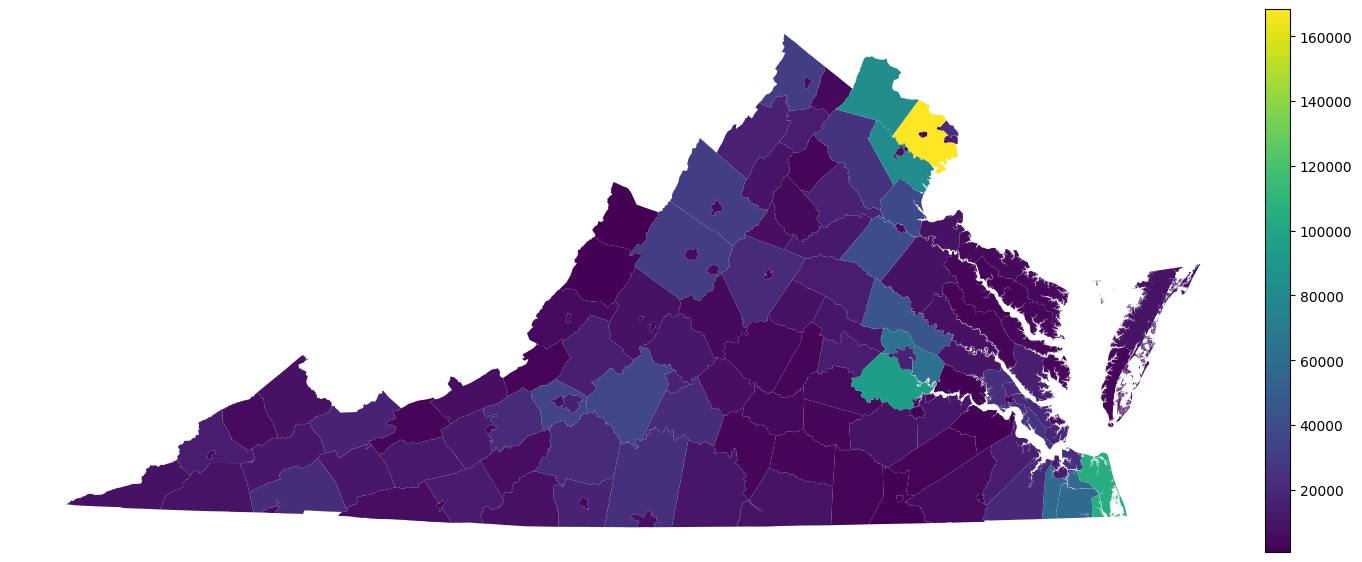

In [89]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='rep_votes_2020',legend=True,cax=cax)

Since both more D's and R's live places where more people live, you get really similar maps. But if you look at the scales, they're very different. We need to represent not just the raw levels, but the vote margins between the two parties.

Difference in Dem and Rep votes:

<Axes: >

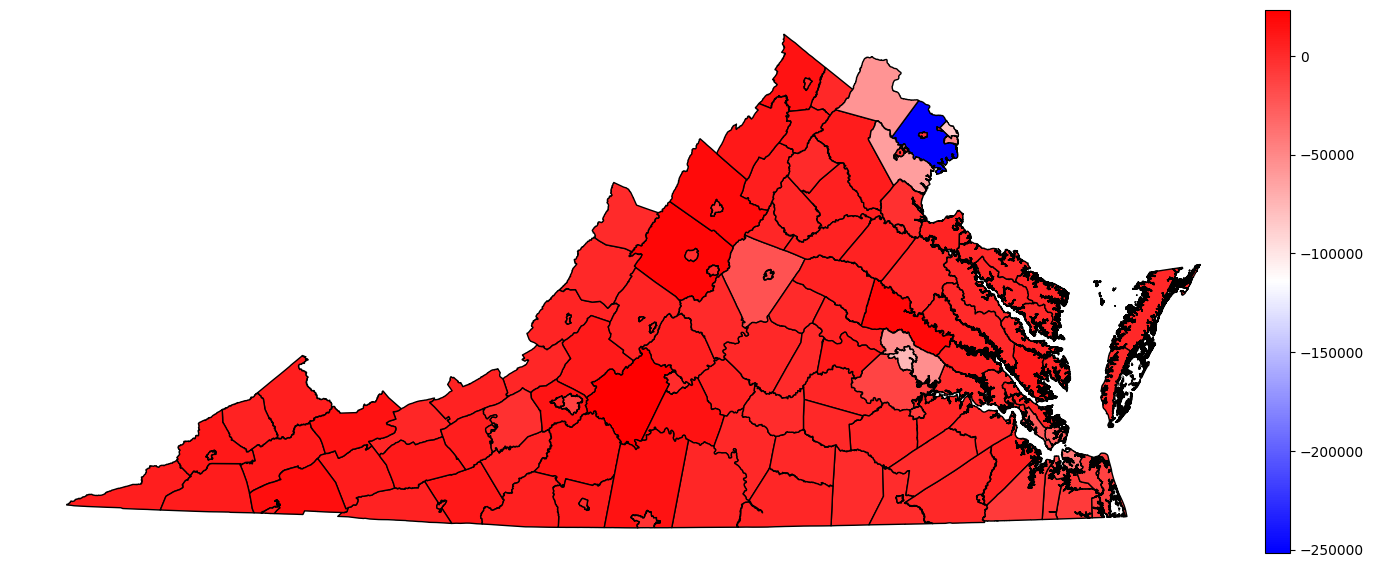

In [90]:
df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cax=cax,cmap='bwr',edgecolor='k')

That plot is somewhat misleading because the "white" color values don't correspond to zero, but rather -100,000, making the state look more red than it is. Because of the psychology of the visualization, it's probably better not to pick red/blue colors:

<Axes: >

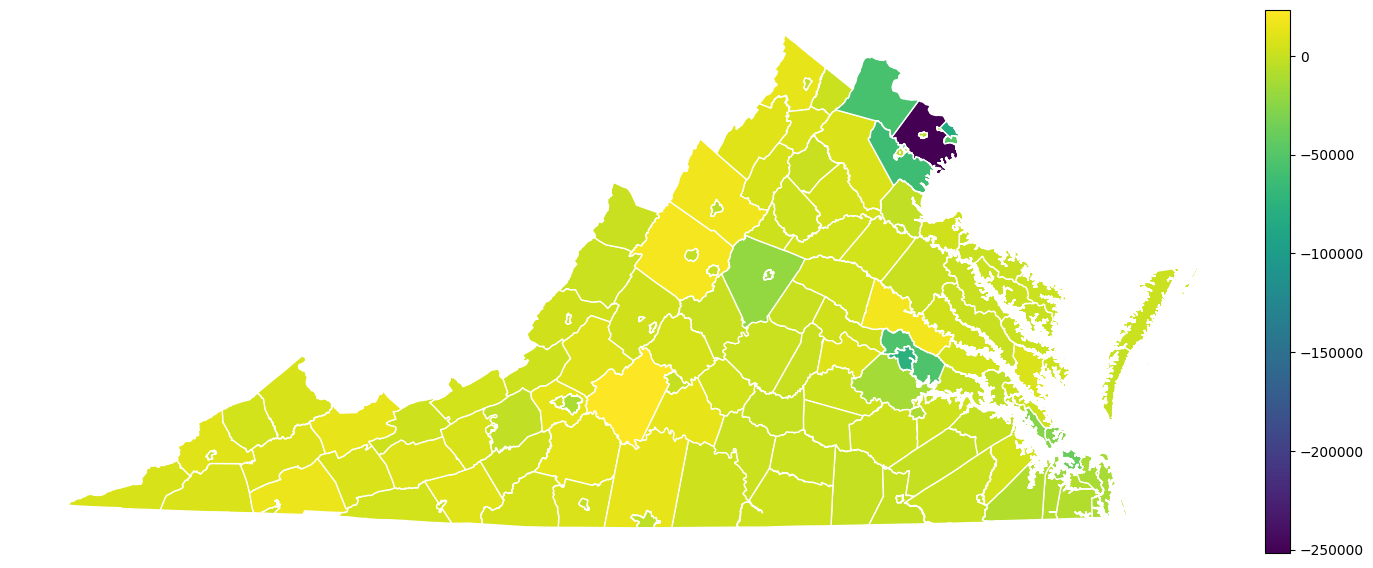

In [91]:
df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cax=cax,edgecolor='w')

Here's a way to discretize the scale:

<Axes: >

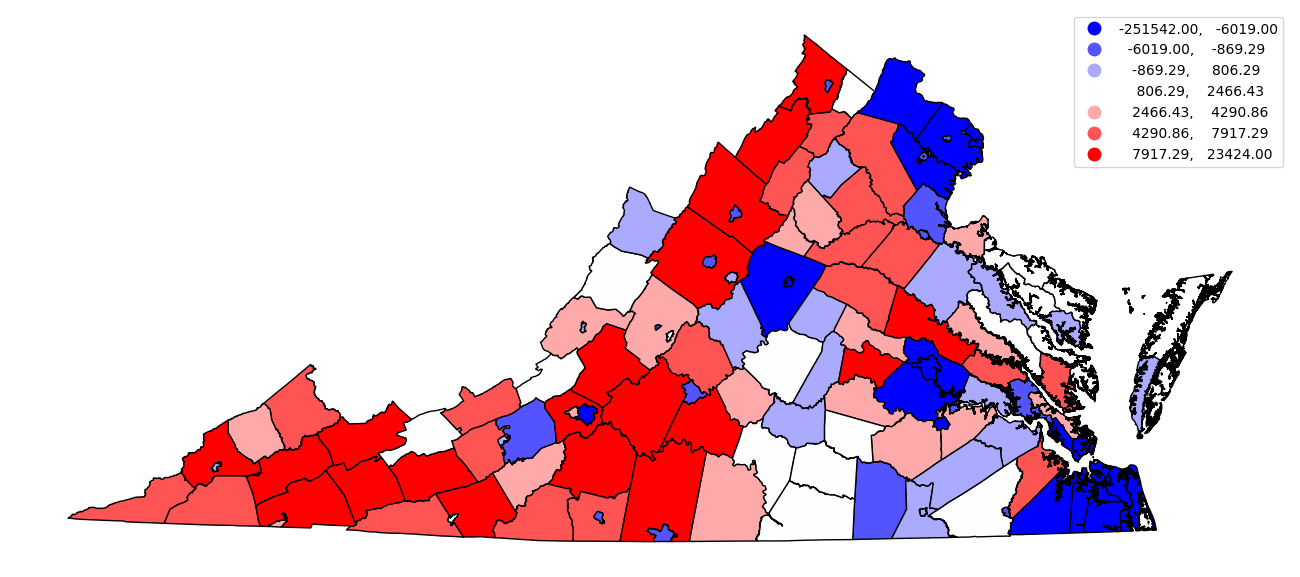

In [92]:
df['vote_diff'] = df['rep_votes_2020']-df['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cmap='bwr',edgecolor='k',scheme='Quantiles',k=7)

Slightly better, still not perfect.

That is a very long tail. Support for the Democrats is extremely strong in the north-northeast and southeast parts of the state.

Let's take the inverse hyperbolic sine of the difference to resolve some of the "long tail" issues:

<Axes: >

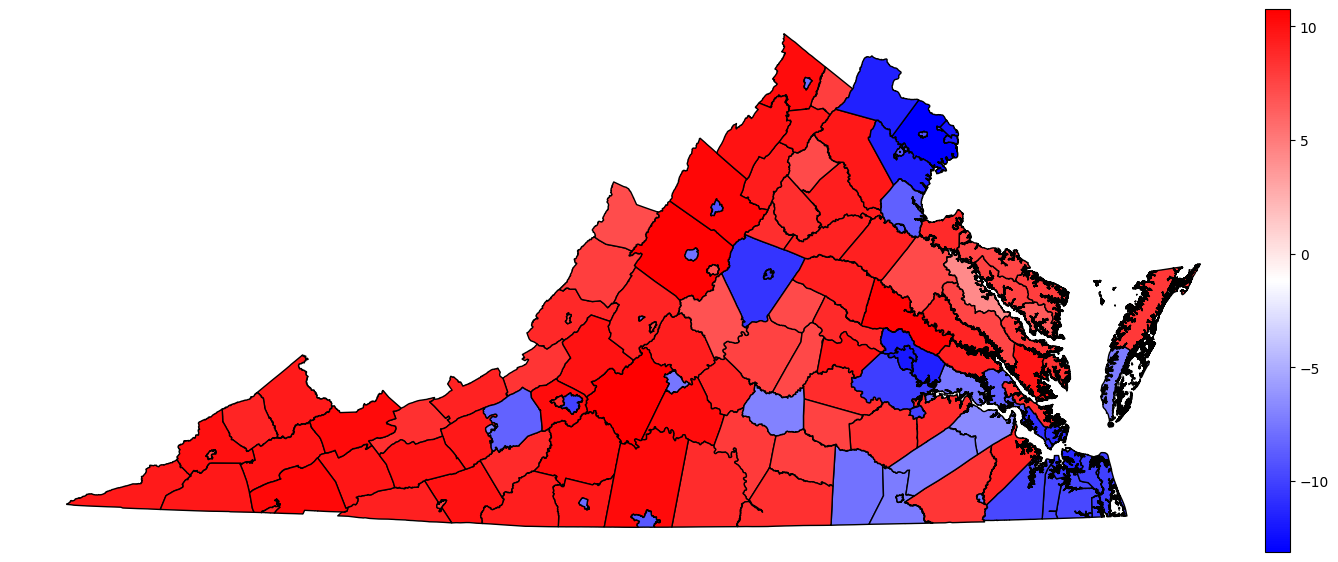

In [93]:
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

This is pretty good. This gives a little more information about where Democrat strongholds are, versus Republican strongholds, and the intensities are in "log votes" rather than percentages, so the picture is easier to interpret.

We could also compute the percent difference:
$$
\dfrac{Dem - Rep}{Rep}
$$


<Axes: >

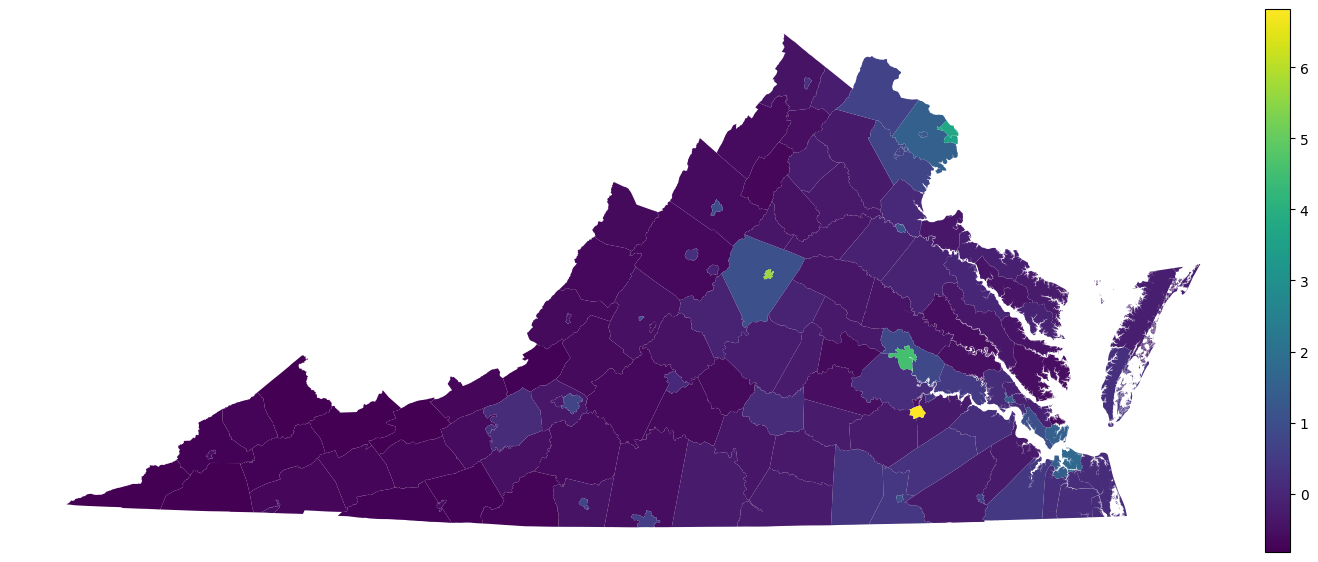

In [94]:
df['pct_diff'] = -df['vote_diff']/df['rep_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='pct_diff',legend=True,cax=cax)

Can you see Charlottesville, Richmond, Fairfax, and Petersburg? The danger in looking at percent difference, though, is that a small place might overwhelmingly prefer one party, but they don't have enough votes to carry the election if they are merged with a nearby political unit that is much larger and more purple. That's why looking at the arcsinh of vote differences gives a pretty useful guide not just to the intensity of support in terms of local opinion, but the vote margin as well.

Notice that if we compute the percent difference in the opposite direction, the pictures seems to tell a slightly different story?

<Axes: >

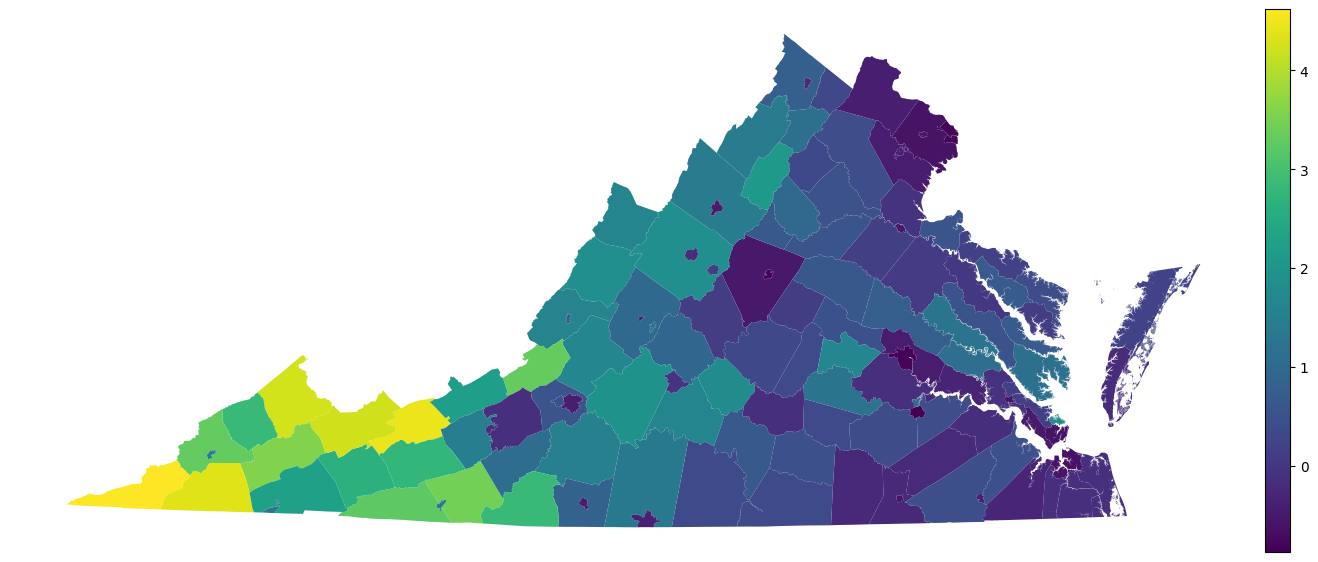

In [95]:
df['pct_diff'] = df['vote_diff']/df['dem_votes_2020']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='pct_diff',legend=True,cax=cax)

So these maps are fun, but you have to be careful to understand what you're looking at before jumping to conclusions.